## Ch25 時間序列預測

我們回顧一下時間序列分析的思想：根據序列的歷史資訊來預測未來，進行預測的前提為序列是定態的，即序列的基本特徴不發生大的改變。若時間序列是特殊的定態序列－－純隨機過程（白雜訊過程），也就是無自相關性，那麼預測也無法進行。因此，我們會對定態的、非隨機序列進行分析，以預測未來。預測的方式通常是建立預測模型，預測模型的一般表達形式為：

$$x_{t+1}=f(x_i),\quad i\le t$$

也就是說，我們位於 $t$ 時點時，是利用 $t$ 期和 $t$ 期之前的資訊對下一期的變數取值進行預測。

### 25.1 移動平均預測

若時間序列具有穩定性或規則性，那麼時間序列有可能會在未來保持過去幾期的發展態勢。時間序列分析中最簡單的預測模型，就是將過去期變數取值進行平均，將平均值作為下一期的預測值。由於在取平均數時，數值的隨機波動成分在一定程度上會被消除掉，所以得到的預測值受過去極端值的干擾減少，從而達到平滑的效果，因此這種平均數預測法被稱為移動平均預測法（Moving Average）。根據「取平均」方法之不同，可以將移動平均法分為簡單移動平均法（Simple Moving Average）、加權移動平均（Weighted Moving Average）和指數移動平均法（Exponential Moving Average）等。

#### 25.1.1 簡單移動平均

簡單移動平均是用某一時點前 $n$期的數值之簡單平均數來預測該時點的數值，以達到平滑的效果。簡單地說，我們用 $x_t,x_{t-1},x_{t-2},...,x_{t-n+1}$ 這 $n$ 個數的簡單平均數來預測，可以用數學公式表達為：

$$\hat{x}_{t+1}=\frac{x_t+x_{t-1}+x_{t-2}+...+x_{t-n+1}}{n}$$

式中各變數的涵義如下：

* $\hat{x}_{t+1}$：對下一期的預測值，或者當期的簡單移動平均數；

* $x_t$：當期隨機變數的實現值；

* $x_{t-i}$：前 $i$ 期隨機變數的實現值；

* $n$：平均值的計算中包括的過去觀察值的個數。每出現一個新觀察值，就要從移動平均中減去一個最早觀察值，再加上一個最新觀察值。

#### 25.1.2 加權移動平均

簡單移動平均對每一期的數值都賦予相同的權重，也就是說，它認為每一個時期的資料對於新的預測值或者是平滑值的影響是一樣的。但現實生活中可能並非如此，即有時候簡單移動平均對於資訊的利用不是很充分。加權移動平均法則是根據同一個時間段內不同時間的資料對預測值的影響程度，分別給予不同的權重，其計算公式為：

$$\hat{x}_{t+1}=w_0x_t+w_1x_{t-1}+...+w_nx_{t-n+1}$$

* $\hat{x}_{t+1}$：對下一期的預測值，或者當期的加權移動平均數；

* $x_t$：當期隨機變數的實現值；

* $x_{t-i}$：前 $i$ 期隨機變數的實現值；

* $w_0$：當期實現值的權重；

* $w_i$：前 $i$ 期實現值的權重，如 $w_1$ 為前一期實現值的權重；以此類推

#### 25.1.3 指數加權移動平均

指數加權移動平均兼具全期平均和移動平均所長：不捨棄過去的資料，但是隨著資料時間點的遠離，其權重逐漸遞減。指數加權移動平均法的基本思想是：考慮時間間隔對事件發展的影響，各期權重隨時間間隔的増大而呈指數衰減。其計算公式如下：

$$\hat{x}_{t+1}=\alpha x_t+\alpha(1-\alpha)x_{t-1}+\alpha(1-\alpha)^2x_{t-2}+...,$$

其中，$\alpha$ 為平滑係數，滿足 $0<\alpha<1$。經驗表明，$\alpha$ 的值介於 0.05－0.3 之間，修匀效果比較好。同理可得：

$$\hat{x}_t=\alpha x_{t-1}+\alpha(1-\alpha)x_{t-2}+\alpha(1-\alpha)^2x_{t-3}+...,$$

所以結合上述兩個式子我們可以得到：

$$\hat{x}_{t+1}=\alpha x_t+(1-\alpha)\hat{x}_t$$

* $\hat{x}_{t+1}$：對下一期的預測值，或者當期的指數加權移動平均數；

* $x_t$：當期隨機變數的實現值；

* $\hat{x}_t$：$t-1$ 期對 $t$ 期的預測值，或 $t-1$ 期的指數加權移動平均數；

* $\alpha$：為平滑係數。

從整理後的式子我們可以發現，任一期的指數加權移動平均數，都是本期實際觀察值 $x_t$ 與前一期指數加權移動平均數的加權平均。確定 $\hat{x}_t$ 的初值 $\hat{x}_1$ 通常有兩種方法：一種是取第一期的實現值為初值；另一種是最初幾期的平均值為初值。

### 25.2 ARMA 模型預測

使用移動平均，我們能夠簡單、快速地對時間序列做出預測。但是，移動平均中的參數（例如選取過去實現值的期數、加權平均的權重值、指數加權平均的平滑係數等）往往是我們主觀設定的，這種主觀設定很容易偏離實際情況，因此在實際應用中，我們很少將移動平均得到的結果直接作為變數未來取值的預測。移動平均常常用在技術分析中，作為判斷股價走勢的技術指標，我們會詳細在本書第五部份介紹其應用，此是後話，此處且按下不表。

為了更好地對時間序列做出預測，學者們發展出各種各樣的時間序列模型。這些畤間序列模型意圖刻劃時間序列背後的統計規律，並根據這些規律來對時間序列做出更為精準的預測。以這種方式進行的時間序列分析之理論建構過程大致可以分為三個階段。

時間序列分析的理論研究開展地比較早，1930 年代前後是理論模型建構的基礎階段，在此期間提出的模型研究物件多是定態的時間序列。Udny Yule 在 1927 年提出了著名的自我迴歸模型（Autoregressive Model，AR 模型）[<sup>4</sup>](#fn4)；移動平均模型（Moving Average Model，MA 模型）也隨之出現。之後學者們將 AR 模型和 MA 模型結合在一起，發展出 ARMA（Autoregressive Moving Average）模型。1970 年，當 ARMA 模型被 Box 和 Jenkins 寫進教科書[<sup>5</sup>](#fn5)時，這個模型逐漸流行起來，並被廣泛應用在學術界和實務界。與此同時，Box 和 Jenkins 也在同一本書中提出了 ARIMA（Autoregressive Integrated Moving Average）模型，該模型的處理對象為非定態的時間序列，ARIMA 模型的提出標誌著時間序列分析理論建構進入成熟階段，在此階段，時間序列模型大量地被應用在實證研究中。

不過以上模型都是假設干擾項的變異數是固定不變的，在實證研究中，學者們發現金融經濟資料很多都存在異質變異數（Heteroskedasticity）現象，因此應用傳統的模型無法獲得可靠的估計結果。時間序列分析的理論建構隨後進入完善階段，Engle 在 1982 年提出 ARCH（Autoregressive Conditional Heteroskedasticity）模型，允許條件變異數發生變動。之後，Bollerslov 延伸了 ARCH 模型，提出應用範圍廣的 GARCH（Generalized Autoregressive Conditional Heteroskedasicity）模型，ARCH 和 GARCH 模型的提出很好地解決了刻畫金融資產收益率序列波動聚集的難題。

也有學者從其他的角度來完善時間序列分析模型，例如 Granger 在 1987 年提出了其整合（Cointegration）理論，將時間序列分析對象拓展到多變數的場景。

本章將重點介紹時間序列分析基礎模型，AR 模型、MA 模型和 ARMA 模型。在後面的章節中，我們會陸續介紹 ARCH 模型、GARCH 模型、共整合理論及其應用。

<span id="fn4"><sup>4</sup> Yule, G.Udny. "On a method of investigating periodicities in disturbed series, with special refrence to Wolfer's sunspot numbers." Philosophical Transaction of the Royal Society of London. Series A, Containing Papers of a Mathematical or Physical Character (1927): 267-298.</span>

<span id="fn5"><sup>5</sup> Box, George EP, and Gwilym M. Jenkins. "Time series analysis: forecasting and control."</span>

#### 25.2.1 自我迴歸模型

AR 模型是一個線性模型，將時間序列變數當期的實現值作為被解譯變數、過去期的歷史資料當作解譯變數，因此被稱作自我迴歸模型。$p$ 階自我迴歸模型（Auto Regressive Model，AR(p)）的一般表示式為：

$$x_t=\phi_0+\phi_1x_{t-1}+\phi_2x_{t-2}+...+\phi_px_{t-p}+\varepsilon_t$$

其中 $\{\varepsilon_t\}$ 是一個白雜訊序列，即滿足：

$$\mathrm{E}(\varepsilon_t)=0;\mathrm{Var}(\varepsilon_t)=\sigma_{\varepsilon}^2;\mathrm{E}(\varepsilon_t\varepsilon_s)=0,\forall s\ne t$$

且解譯變數 $x_s$ 與殘差項 $\varepsilon_t$ 無相關性，即 $\mathrm{E}(x_s\varepsilon_t)=0,\forall s<t$。為了研究 AR 模型旳統計性質，我們先舉個簡單的例子，假設定態的時間序列 $x_t$ 可以用 AR(2) 模型來刻畫：

$$x_t=\phi_0+\phi_1x_{t-1}+\phi_2x_{t-2}+\varepsilon_t,\quad |\phi_1|<1,|\phi_2|<1$$

因為定態的時間序列之均值不隨時間發生改變，所以：

$$\mu=\mathrm{E}(x_t)=\phi_0+\phi_1\mathrm{E}(x_{t-1})+\phi_2\mathrm{E}(x_{t-2})+\mathrm{E}(\varepsilon_t)$$

即：

$$\mu=\phi_0+\phi_1\mu+\phi_2\mu+0\mu=\frac{\phi_0}{1-\phi_1-\phi_2}$$

然後我們將式子左右兩邊分別將去均值 $\mu$ 可得：

$$
\begin{split}
x_t-\mu&=\phi_0+\phi_1(x_{t-1}-\mu)+\phi_2(x_{t-2}-\mu)+(\phi_1+\phi_2-1)\mu+\varepsilon_t\\
&=\phi_1(x_{t-1}-\mu)+\phi_2(x_{t-2}-\mu)+\varepsilon_t
\end{split}\label{eq:25.5}\tag{25.5}
$$

將式 ($\ref{eq:25.5}$) 左右兩邊分別乘以 $(x_{t-1}-\mu)$ 再除以變異數 $\gamma_0$ 之後，可以得到下式：

$$\frac{\gamma_1}{\gamma_0}=\phi_1\frac{\gamma_0}{\gamma_0}+\phi_2\frac{\gamma_1}{\gamma_0}$$

即

$$\rho_1=\phi_1+\phi_2\rho_1$$

可以解得：

$$\rho_1=\frac{\phi_1}{1-\phi_2}$$

用同樣的方式乘以 $(x_{t-2}-\mu)$ 可得：

$$\rho_2=\phi_1\rho_1+\phi_2$$

這樣可以計算出：

$$
\begin{split}
\rho_1&=\frac{\phi_1}{1-\phi_2}\rho_2\\
&=\phi_1\rho_1+\phi_2
\end{split}
$$

式 ($\ref{eq:25.5}$) 左右兩邊同時乘以 $(x_{t-k}-\mu),\forall k\ge 3$，可得 3 階以上（包含 3 階）的自相關係數 $\rho_k=\phi_1\rho_{k-1}+\phi_2\rho_{k-2}$，可以看出符合 AR 模型的時間序列之自相關係數會隨著階數的增加而減小，但是很多階數之後仍不等於 0，會呈現出所謂拖尾的現象。

現在我們將分析拓展至 AR(p) 模型，如果時間序列是定態的，可得：

$$\mu=\frac{\phi_0}{1-\phi_1-\phi_2-...-\phi_p}$$

將 (${\ref{eq:25.3}}$) 左右兩邊減去均值$\mu$，可得：

$$x_t-\mu=\phi_1(x_{t-1}-\mu)+\phi_2(x_{t-2}-\mu)+...+\phi_p(x_{t-p}-\mu)+\varepsilon_t\label{eq:25.6}\tag{25.6}$$

將式 ($\ref{eq:25.6}$) 左右兩邊分別乘以 $(x_t-\mu)$、$(x_{t-1}-\mu)$、..、並除以變異數 $\gamma_0$ 可得：

$$
\begin{split}
1&=\phi_1\rho_1+\phi_2\rho_2+...+\phi_p\rho_p\\
\rho_1&=\phi_1+\phi_2\rho_1+\phi_3\rho_2+...+\phi_p\rho_{p-1}\\
\rho_2&=\phi_1\rho_1+\phi_2+\phi_3\rho_1+...+\phi_p\rho_{p-2}\\
&\vdots\\
\rho_p&=\phi_1\rho_{p-1}+\phi_2\rho_{p-2}+\phi_3\rho_{p-3}+...+\phi_p
\end{split}
$$

根據這些線性關係式，我們可以解得 $\rho_1,\rho_2,...\rho_p$，對於大於 $p$ 階的自相關係數 $\rho_k$，也有：

$$\rho_k=\phi_1\rho_{k-1}+\phi_2\rho_{k-2}+...+\phi_p\rho_{k-p}$$

因此，符合 AR(p) 模型的定態時間序列，其自相關係數在 $p$ 階之後依然可能不
為 0。

#### 25.2.2 移動平均模型

MA(q) 模型認為因變數序列 $x_t$ 與隨機誤差項（Random Error）的當期值 $\varepsilon_t$ 及 $q$ 期落後值 $\varepsilon_{t-1},\varepsilon_{t-2},...\varepsilon_{t-q},$ 有關、而且是隨機誤差項的加權平均，因此被稱作移動平均模型。一個 $q$ 階移動平均模型 MA(q) 可以用數學表達為：

$$x_t=\mu+\varepsilon_t+\theta_1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}$$

其中 $\{\varepsilon_t\}$ 是白雜訊序列，滿足：

$$\mathrm{E}(\varepsilon_t)=0;\mathrm{Var}(\varepsilon_t)=\sigma_{\varepsilon}^2;\mathrm{E}(\varepsilon_t\varepsilon_s)=0,\forall s\ne t$$

由於 MA(q) 僅僅是白雜訊過程的線性組合，因此有：

$$
\begin{split}
\mathrm{E}(x_t)&=\mu,\\
\mathrm{Var}(x_t)&=\gamma_0=(1+\theta_1^2+\theta_2^2+...+\theta_q^2)\sigma_\varepsilon^2,\\
\rho_l&=
\begin{cases}
1, &l=0\\
\cfrac{(\theta_1+\theta_{l+1}\theta_1+\theta_{l+2}\theta_2+...+\theta_q\theta_{q-l})}{(1+\theta_1^2+\theta_2^2+...+\theta_q^2)}, &\forall l=1,2,...,q\\
0, &\forall l>q
\end{cases}
\end{split}
$$

由上式我們可以得知 MA(q) 模型一個很重要的統計性質：MA(q) 模型自相關係數 $q$ 階截尾。所謂的 $q$ 階截尾是指，在 $q$ 階以後 MA(q) 模型的自相關係數上截止，$q+1$ 階起就等於 0（即上式 $\gamma_l=0,\forall l>q$ 所表達的內容）。考慮 AR 模型和 MA 模型自相關係數的性質，我們可以根據自相關圖，來初步判斷所研究的時間序列大致符合什麼類別的模型。

### 25.3 ARMA 模型
AR(p) 模型認時間序列中 $x_t$ 的值與過去 $p$ 期的落後值有關，MA(q) 模型則用落後 $q$期的隨機擾動項來解譯當期的 $x_t$。不過金融經濟領域中，很多變數的值既會與自己過去期的表現有關係、又受到過去隨機誤差的影響，ARMA 模型表達的就是這個思想。ARMA 模型是研究時間序列的重要方法，由 AR 模型與 MA 模型混合構成。ARMA(p,q) 模型的一般表示式為：

$$x_t=\phi_0+\phi_1x_{t-1}+\phi_2x_{t-2}+...+\phi_px_{t-p}+\varepsilon_t+\theta_1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}$$


其中 $\{\varepsilon_t\}$ 是零均值白雜訊序列，滿足：

$$\mathrm{E}(\varepsilon_t)=0;\mathrm{Var}(\varepsilon_t)=\sigma_{\varepsilon}^2;\mathrm{E}(\varepsilon_t\varepsilon_s)=0,\forall s\ne t$$

很顯然，相較於 AR(p) 和 MA(q) 模型，ARMA(p,q) 更具有普適性，AR(p) 是 $q=0$ 時的 ARMA(p,q) 模型，MA(q) 模型是當 $p=0$ 時的 ARMA(p,q) 模型。

### 25.4 ARMA 模型的建模過程

如前所述，我們分析的對象是定態非白雜訊的序列。現在我們要建構 ARMA 模型以便預測未來，建構一個 ARMA 模型通常需要 3 個步驟：

1. 序列識別

   1. 判斷我們需要建模分析的資料是否為定態序列，若非定態序列需對其進行變換處理，使其成為定態序列。
   
   2. 接著再判斷定態的序列是否白雜訊序列，若為白雜訊序則列建模結束（白雜訊過程無法建構 ARMA 模型）；若為非白雜訊序列，則進行下一步。

2. 模型識別與估計：決定 $p$ 和 $q$ 的值，選出相對最優的模型架構。透過時間序列的自相關函數 ACF 和偏自相關函數 PACF 大致決定。一般規則如表 25.1 所示：


>表25.1：模型識別表

模型     |ACF                 |PACF
:-------:|:------------------:|:-----------------:
AR(p)    |拖尾（幾何型或震蕩型）|$p$ 階截尾
MA(q)    |$q$ 階截尾           |拖尾（幾何型或震蕩型）
ARMA(p,q)|拖尾（幾何型或震蕩型）|拖尾（幾何型或震蕩型）

如果序列的 ACF 和 PACF 不是很明確的話，我們可以嘗試著建立若干個備選模型，然後根據 AIC 或是 BIC 指標來選取。AIC 是一種用於模型選取的指標，同時考慮了模型的擬合程度以及簡單性，而 BIC 則是對 AIC 的一個改進。一般而言，較小的 AIC 或者 BIC 表明模型在保持簡單的同時能夠很好地對時間序列進行擬合。因此，我們往往會選取具有最小的 AIC 或 BIC 的模型作為相對最優的模型。

3. 模型診斷：對模型殘差進行檢定，確保其是服從常態分佈的白雜訊序列。當模型的殘差是白雜訊時，說明我們已經將序列的資訊充分截取到模型中。

### 25.5 CPI 資料的 ARMA 短期預測

這一節，我們將建立一個完整的 ARMA 模型，並用其對序列進行短期的預測，以輔助讀者更好地理解 ARMA 模型。我們使用 2001 年 1 月到 2014 年 2 月的中國大陸的月度 CPI（Consumer Price Index，物價指數）資料建立 ARMA 模型。

###### 1. 進行序列識別

我們先讀取資料，對資料進行前處理，並判斷其定態性。

In [44]:
import pandas as pd

# 讀取資料
CPI=pd.read_csv('.\\PythonBook_code_data\\part4\\025\\CPI.csv',index_col='time')

# 將資料轉換成時間序列格式便於之後的處理
CPI.index=pd.to_datetime(CPI.index)

# 檢視前三筆資料
CPI.head(n=3)

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5


In [2]:
# 檢視後三筆資料
CPI.tail(n=3)

,CPI
time,
2001-03-01,99.4
2001-02-01,100.2
2001-01-01,101.9


為了能夠評價我們模型的好壞，看看模型預測的精準度如何，我們選出序列的後面三個樣本作為預測對照，除此以外序列前面的部分作為估計擬合模型參數的樣本（即訓練資料集），命名為「CPItrain」。亦即，我們用前面訓練集中的 158 個資料進行建模，然後預測第 159、160、161 這三個數（2014 年 3 月、4 月和 5 月這三個月份的月度 CPI 資料），然後再和這三個月份的實際月度 CPI 資料進行比較，以判斷評價模型的預測能力。

In [5]:
# 按照日期先後順序排序
CPI=CPI.sort_index()

# 選擇 train data
CPItrain=CPI[:-3]
CPItrain.tail(n=3)

,CPI
time,
2013-12-01,100.3
2014-01-01,101.0
2014-02-01,100.5


In [7]:
# 選擇 test data
CPItest = CPI[-3:]
CPItest

,CPI
time,
2014-03-01,99.5
2014-04-01,99.7
2014-05-01,100.1


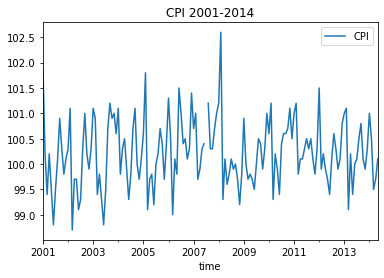

In [8]:
# 繪製時序圖，直觀瞭解資料情況
CPI.plot(title='CPI 2001-2014')

透過觀察序列的時序圖（圖 25.1），我們發現序列看上去還算定態，並未呈現出明顯的遞增遞減趨勢。接下來，對序列進行 ADF 單根檢定，判斷其定態性。

In [10]:
# 加載 ADF 函數
from arch.unitroot import ADF

# 進行 ADF 單根檢定，並檢視結果
# 最大落後階數設為 10
# 防止使用的落後階數過多導致 p-value 偏低

CPItrain=CPItrain.dropna().values

print(ADF(CPItrain,max_lags=10).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.947
P-value                         0.040
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


由於統計量等於 -2.947，小於 5% 顯著性水平下的臨界值 -2.88，因而我們可以拒絕虛無假設，接受對立假設，認為序列是定態的。

接下來，我們需要判斷 CPI 序列是否為白雜訊序列，我們採用上一章介紹過的 Ljung-Box 檢定（簡稱為 LB 檢定）來確定 CPI 序列是否為白雜訊。我們再次回顧一下它的檢定統計量。

Ljung-Box 檢定採用的統計量是 $Q$ 統計量，其表示式為：

$$Q(m)=n(n+2)\sum_{k=1}^m\frac{\rho_k^2}{n-k}\sim\chi_m^2$$

其中，$\rho_k$ 是序列的 $k$ 階自相關係數，$n$ 是觀測值的個數，$m$ 是設定的落後階數。Ljung-Box 檢定的虛無假設為「所檢定序列是白雜訊序列」。

用 Python 實作「CPI 序列是否為白雜訊」的檢定過程如下所示：

In [12]:
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(CPItrain)[1:12],len(CPItrain))
LjungBox[1][-1]

0.0005560128948515358

從上述結果我們得知，檢定的 $p$ 值為 $0.000556<0.05$（常見的顯著性水平），所以們應該拒絕虛無假設，接受對立假設，認為 CPI 序列不是白雜訊序列。至此，我們已經完成了序列的識別工作，確認即將參與建模的 CPI 序列是定態非白雜訊序列，進入模型建構階段。

###### 2. 模型識別與估計
我們已確定採用的模型為ARMA模型，我們還需識別模型的參數P和。此處，
我們將利用ACF和PACF來判斷模型的具體形式。

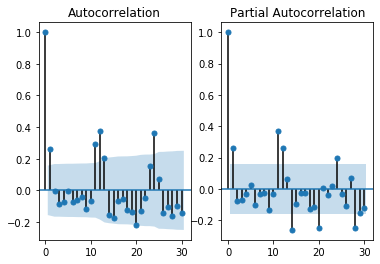

In [15]:
# 將畫面一分為二
# 在第一個畫面中畫出序列的自相關係數圖
# 在第二個畫面中畫出序列的偏自相關係數圖
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
axel=plt.subplot(121)
axe2=plt.subplot(122)
plotl=plot_acf(CPItrain,lags=30,ax=axel)
plot2=plot_pacf(CPItrain,lags=30,ax=axe2)

圖25.2：CPItrain的自相關和偏自相關係數圖

透過 CPI 訓練集的 ACF 和 PACF 圖（圖 25.2），我們發現序列的自相關係數和偏自相關係數都呈現出拖尾的性質，因此可以初步判斷 $p>0,q>0$。至於 $p$ 和 $q$ 的具體取值，我們現在還無法判斷。因此，我們考慮建立起低階 $p$、$q$ 的各種組合情況下的 ARMA 模型，並運用 AIC 準則進行比較，選出 AIC 值最小的模型。模型建立的程式碼如下：

In [34]:
# order 表示建立的模型的階數，$c(1,0,1)$ 表示建立的是 ARMA(11) 模型；
# 中間的數字 0 表示使用原始的、未進行過差分（差分次數為 0）的數據；
# 此處我們無需考慮它

from statsmodels.tsa import arima_model
model1=arima_model.ARIMA(CPItrain,order=(1,0,1)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:                     ARMA(1, 1)   Log Likelihood                -150.339
Method:                       css-mle   S.D. of innovations              0.630
Date:                Fri, 21 Feb 2020   AIC                            308.678
Time:                        21:48:43   BIC                            320.903
Sample:                             0   HQIC                           313.643
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2373      0.066   1516.139      0.000     100.108     100.367
ar.L1.y        0.0934      0.248      0.377      0.707      -0.392       0.579
ma.L1.y        0.1932      0.240      0.805      0.422      -0.277       0.664
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.7069           +0.0000j           10.7069            0.0000
MA.1           -5.1771           +0.0000j            5.1771            0.5000
-----------------------------------------------------------------------------
"""

In [24]:
# 同理我們建立起其他階數的模型
model2=arima_model.ARIMA(CPItrain,order=(1,0,2)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:                     ARMA(1, 2)   Log Likelihood                -150.261
Method:                       css-mle   S.D. of innovations              0.630
Date:                Fri, 21 Feb 2020   AIC                            310.521
Time:                        21:42:32   BIC                            325.802
Sample:                             0   HQIC                           316.727
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2375      0.067   1502.409      0.000     100.107     100.368
ar.L1.y       -0.2048      0.673     -0.304      0.761      -1.523       1.114
ma.L1.y        0.4956      0.667      0.743      0.459      -0.811       1.802
ma.L2.y        0.1054      0.199      0.531      0.596      -0.284       0.495
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.8833           +0.0000j            4.8833            0.5000
MA.1           -2.3501           -1.9904j            3.0797           -0.3882
MA.2           -2.3501           +1.9904j            3.0797            0.3882
-----------------------------------------------------------------------------
"""

In [33]:
model3=arima_model.ARIMA(CPItrain,order=(2,0,1)).fit()
#model3.summary()
model4=arima_model.ARIMA(CPItrain,order=(2,0,2)).fit()
#model4.summary()
model5=arima_model.ARIMA(CPItrain,order=(3,0,1)).fit()
#model5.summary()

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>表 25.2：5個模型的 AIC 值

模型   |mod1   |mod2   |mod3   |mod4   |mod5
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
$(p,q)$|(1,1)  |(1,2)  |(2,1)  |(2,2)  |(3,1)
AIC 值 |308.678|310.521|307.933|309.271|308.496

將上述 5 個模型的 AIC 值彙總於表 25.2 中，觀察表 25.2 可以得知，ARMA(2,1) 模型的 AIC 值最小，是備選模型中最好的模型。故我們將最終的模型確定為 ARMA(2,1)。

###### 3. 模型診斷

建立好模型後，我們需要對模型進行評價。這裡的評價不僅包括係數顯著性的檢定，還包括對殘差序列是否為白雜訊的檢定。如果殘差序列是白雜訊序列，則說明我們的模型已充分提取了序列的資訊。我們無法再透過調整模型從資料中抓取更多的資訊，因而模型的建立是成功的。如果殘差序列是非白雜訊序列，則說明我們的模型是不完善的，需要對其進行修正。

首先我們運用 conf_int() 函數計算模型中係數的信賴區間。可以看到，所有係數的信賴區問都不包含 0，因此我們可以說在 5% 的信心水準下，所有係數都是顯著的。

In [36]:
model3.conf_int()

array([[100.21675637, 100.28665498],
       [  1.10187357,   1.40468439],
       [ -0.45849028,  -0.14658293],
       [ -1.03905907,  -0.96094091]])

接下來是對於殘差序列的純隨機性的檢定。

0.0026469222621718033

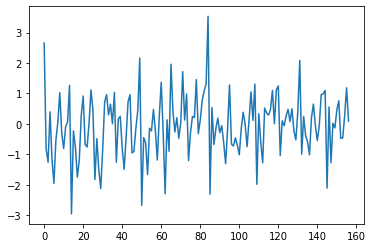

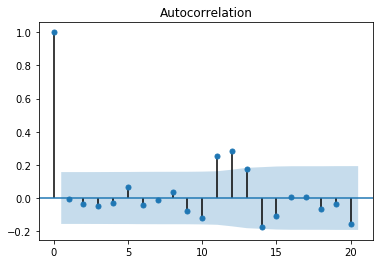

In [38]:
# 繪製時間序列模擬的診斷圖
import math
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
stdresid=model3.resid/math.sqrt(mode13.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=20)

LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))

LjungBox[1][-1]

In [39]:
# 增加 Ljung-Box 檢定的落後階數
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]

0.0026469222621718033

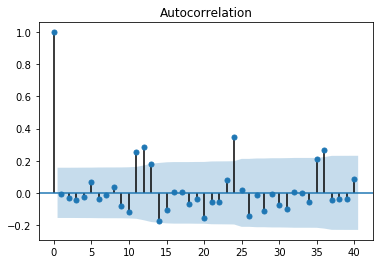

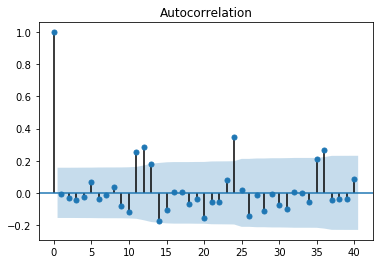

In [40]:
# 繪製最大落後階數為 40 的自相關係數圖
plot_acf(stdresid,lags=40)

圖25.3：標準化殘差
圖25.4：標準化殘差的 ACF
圖25.5：調整後的自相關係數圖

從圖 25.3 中可以看出，殘差基本在 $\pm 3$ 之內，沒有偏差值。但是，在 ACF 圖中，第 11 階和第 12 階的自相關係數是顯著的。因此，我們還無法確定殘差是白雜訊序列。為了驗證殘差是不是白雜訊序列，我們増加了 Ljung-Box 檢定的落後階數。

可以看到，在 12 階之後，檢定的 $p$ 值都小於 5% 。因此，模型的殘差並不是一個白雜訊序列。實際上，這是因為我們並沒有考慮到資料的季節性。如果將自相關係數圖的最大落後階數設為 40 的話，可以很明顯地看到每隔 12 階自相關係數就會變得顯著（圖 25.5）。該結果表明我們的模型並沒有很好地擬合原資料，我們需要一個季節性 ARIMA 模型。關於季節性 ARIMA 模型，讀者可以自行搜索相關資料我們就不在這裡細說了。

###### 4. 運用模型進行預測

我們用 forecast() 函數基於以上估計的模型對未來的序列值進行預測，所用的程式如下所示。

In [41]:
# 甪 model3 預測未來 3 期的 CPI
model3.forecast(3)[0]

array([100.27850933, 100.21018002, 100.19155335])

透過程式碼結果可知，2014 年 3 月、4 月和 5 月的月度 CPI 預測值分別為 100.2785，0.2102，100.1916。為了比較預測結果，我們可以檢視一下原資料集中 2014 年 3 月、4 月和 5 月的月度環比 CPI 的實際值。

In [42]:
CPI.head(3)

,CPI
time,
2001-01-01,101.9
2001-02-01,100.2
2001-03-01,99.4


### 25.6 股票收益率的定態時間序列建模

為了加深讀者的印象，我們再舉一個定態時間序列建模的例子：2013-2014 年的泰山（1218）日收益率序列的時間序列建模。建模程式碼如下所示：

In [45]:
# 讀取資料
taisun=pd.read_csv('.\\PythonBook_code_data\\part4\\025\\1218.csv',sep='\t')
taisun.index=pd.to_datetime(taisun.Date)
taisun.head()

,CO_ID,CoName,Date,ROI
Date,,,,
2010-01-04,1218,Taisun Enterprise,2010/01/04,0.3831
2010-01-05,1218,Taisun Enterprise,2010/01/05,3.8168
2010-01-06,1218,Taisun Enterprise,2010/01/06,0.3676
2010-01-07,1218,Taisun Enterprise,2010/01/07,0.7326
2010-01-08,1218,Taisun Enterprise,2010/01/08,-0.3636


In [46]:
returns=taisun.ROI['2013-01-01':'2015-01-01']
returns.head(n=3)

Date
2013-01-02    1.5674
2013-01-03   -0.6173
2013-01-04   -0.3106
Name: ROI, dtype: float64

In [47]:
returns.tail(n=3)

Date
2014-12-29    0.0000
2014-12-30   -0.4132
2014-12-31   -0.4149
Name: ROI, dtype: float64

In [48]:
# 檢定序列是定態的
ADF(returns).summary()

Test Statistic,-15.535
P-value,0.000
Lags,2


從 ADF 的檢定結果 Test Statistic 的取值 $-15.535<-3.44$，則不能接受有單根的假定，我們可以推斷該收益率序列是定態的。接下來，我們再檢定該收益率是否為白雜訊過程。

In [50]:
stattools.q_stat(stattools.acf(returns)[1:10],len(returns))[1]

array([0.34563458, 0.27809919, 0.00662568, 0.01554591, 0.01479295,
       0.02546276, 0.0310641 , 0.01483178, 0.01835496])

檢定最後一個 $p$ 值的取值為 $0.01835496<0.05$，泰山（1218）2014-2015 年的日收益率序列不是白雜訊過程。接下來，我們建立 ARMA 模型。

In [51]:
model=arima_model.ARIMA(returns,order=(2,0,1)).fit()
model.summary()

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  494
Model:                     ARMA(2, 1)   Log Likelihood                -865.300
Method:                       css-mle   S.D. of innovations              1.395
Date:                Fri, 21 Feb 2020   AIC                           1740.600
Time:                        21:54:35   BIC                           1761.612
Sample:                             0   HQIC                          1748.849
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0480      0.047     -1.015      0.311      -0.141       0.045
ar.L1.ROI      0.5672      0.183      3.093      0.002       0.208       0.927
ar.L2.ROI     -0.0687      0.051     -1.345      0.179      -0.169       0.031
ma.L1.ROI     -0.6226      0.180     -3.464      0.001      -0.975      -0.270
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5520           +0.0000j            2.5520            0.0000
AR.2            5.7028           +0.0000j            5.7028            0.0000
MA.1            1.6062           +0.0000j            1.6062            0.0000
-----------------------------------------------------------------------------
"""

In [52]:
model.conf_int()

,0,1
const,-0.140687,0.044713
ar.L1.ROI,0.207816,0.926596
ar.L2.ROI,-0.168849,0.031424
ma.L1.ROI,-0.974822,-0.270367


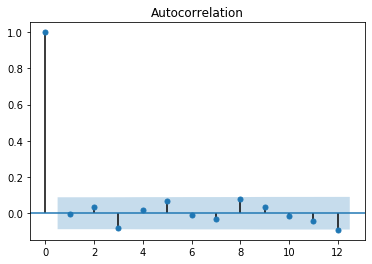

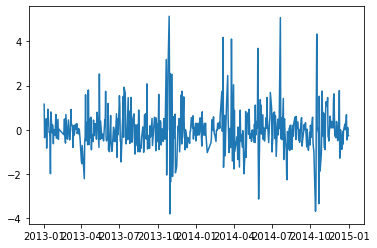

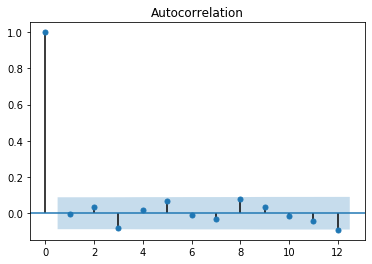

In [54]:
# 殘差診斷
stdresid=model.resid/math.sqrt(model.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=12)

圖 25.6：標準化殘差一泰山（1218）

圖 25.7：標準化殘差的 ACF一泰山（1218）

結果如圖 25.6 和圖 25.7 所示。從 ACF 圖可以看出，殘差項之間沒有顯著的自相關性。

In [55]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:12],len(stdresid))
LjungBox[1]

array([0.9288765 , 0.72609562, 0.26008112, 0.38626268, 0.27800641,
       0.38281915, 0.43225364, 0.24520116, 0.28448999, 0.36098702,
       0.37234771])

針對自相關性的 LB 檢定也有足夠高的 $p$ 值，即殘差序列白雜訊的虛無假設無法被拒絕。基於以上結果，可基本得出結論，我們的模型滿足要求。